<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/FDA_TRAINING_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Death train

In [20]:
death_file = pd.read_csv('/content/death_train.csv')

In [21]:
death_file.head()

,Unnamed: 0,Internalpatientid,Age at death,Death date
0,0,100036,72.412770,2015-01-18 20:49:10.0
1,1,100037,75.241135,2008-10-16 15:14:26.0
2,2,100045,85.399403,2019-01-26 11:33:52.0
3,3,100095,84.136551,2004-08-10 21:49:35.0
4,6,10013,68.372126,2007-06-11 00:17:06.0


In [22]:
death_file = death_file.drop('Unnamed: 0', axis = 1)
death_file.head()

,Internalpatientid,Age at death,Death date
0,100036,72.412770,2015-01-18 20:49:10.0
1,100037,75.241135,2008-10-16 15:14:26.0
2,100045,85.399403,2019-01-26 11:33:52.0
3,100095,84.136551,2004-08-10 21:49:35.0
4,10013,68.372126,2007-06-11 00:17:06.0


# Demographic event train

In [32]:
df1 = pd.read_csv('/content/demographics_event_train.csv')

In [33]:
df1.head()

,Unnamed: 0,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,1,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,2,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,4,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,5,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,6,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


In [34]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1.head()

,Internalpatientid,Age at update,Event date,Marital status,Ruca category
0,100028,78.990830,2020-08-24 03:33:32.0,Married,Urban
1,100032,91.357622,2008-02-07 05:03:27.0,Married,Rural
2,100046,72.961415,2003-09-14 09:32:12.0,Married,Urban
3,100071,75.221222,2019-04-25 08:33:42.0,Widowed,Urban
4,100091,80.955929,2022-02-09 09:24:20.0,Never married,Urban


In [35]:
#Latest event date
df1['Event date'].max()

'2027-01-10 09:08:23.0'

In [36]:
df1.shape

(133252, 5)

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133252 entries, 0 to 133251
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Internalpatientid  133252 non-null  int64  
 1   Age at update      133252 non-null  float64
 2   Event date         133252 non-null  object 
 3   Marital status     133252 non-null  object 
 4   Ruca category      133252 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.1+ MB


In [38]:
df1.isnull().sum()

Internalpatientid    0
Age at update        0
Event date           0
Marital status       0
Ruca category        0
dtype: int64

In [39]:
print(df1.describe())

       Internalpatientid  Age at update
count      133252.000000  133252.000000
mean        84418.709610      77.170080
std         48774.184479      10.875653
min             1.000000      20.842028
25%         42206.750000      70.249313
50%         84381.500000      77.517270
75%        126615.250000      85.232575
max        169064.000000     113.615599


In [40]:
print(df1.nunique())

Internalpatientid    133252
Age at update        133251
Event date           133242
Marital status            8
Ruca category             4
dtype: int64


In [41]:
print(df1['Age at update'].min())
print(df1['Age at update'].max())
print(df1['Age at update'].mean())

20.84202779044434
113.6155990968739
77.17008045257633


In [59]:
# Define the age ranges
age_ranges = [(22, 35), (36, 45), (46, 55), (56, 65), (66, 75), (75, 85), (86, 95), (96, 105)]



# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_marital_status'
    second_range_label = f'{range_start}-{range_end}_rural_cat'
    df1[range_label] = df1.apply(
        lambda row: row['Marital status'] if range_start <= row['Age at update'] <= range_end else None,
        axis=1
    )
    df1[second_range_label] = df1.apply(
        lambda row: row['Ruca category'] if range_start <= row['Age at update'] <= range_end else None,
        axis=1
    )

In [60]:
# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df1_grouped =df1.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df1_grouped

<ipython-input-60-bf21c276bb69>:2: FutureWarning: ['Age at update'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df1_grouped =df1.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))


,Event date,Marital status,Ruca category,22-35_marital_status,22-35_rural_cat,36-45_marital_status,36-45_rural_cat,46-55_marital_status,46-55_rural_cat,56-65_marital_status,56-65_rural_cat,66-75_marital_status,66-75_rural_cat,75-85_marital_status,75-85_rural_cat,86-95_marital_status,86-95_rural_cat,96-105_marital_status,96-105_rural_cat
Internalpatientid,,,,,,,,,,,,,,,,,,,
1,2024-07-02 21:13:18.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
2,2024-04-05 03:30:10.0,Divorced,Urban,,,,,,,,,Divorced,Urban,,,,,,
3,2007-01-28 09:40:39.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
4,2015-08-26 20:13:17.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
5,2005-01-19 06:27:32.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169060,2018-01-06 19:48:18.0,Married,Rural,,,,,,,,,Married,Rural,,,,,,
169061,2024-01-29 12:14:06.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
169062,2007-02-11 18:29:35.0,Divorced,Urban,,,,,,,,,,,Divorced,Urban,,,,


In [61]:
# Reset the index of the grouped DataFrame
df1_grouped = df1_grouped.reset_index()
df1_grouped

,Internalpatientid,Event date,Marital status,Ruca category,22-35_marital_status,22-35_rural_cat,36-45_marital_status,36-45_rural_cat,46-55_marital_status,46-55_rural_cat,56-65_marital_status,56-65_rural_cat,66-75_marital_status,66-75_rural_cat,75-85_marital_status,75-85_rural_cat,86-95_marital_status,86-95_rural_cat,96-105_marital_status,96-105_rural_cat
0,1,2024-07-02 21:13:18.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
1,2,2024-04-05 03:30:10.0,Divorced,Urban,,,,,,,,,Divorced,Urban,,,,,,
2,3,2007-01-28 09:40:39.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
3,4,2015-08-26 20:13:17.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
4,5,2005-01-19 06:27:32.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133247,169060,2018-01-06 19:48:18.0,Married,Rural,,,,,,,,,Married,Rural,,,,,,
133248,169061,2024-01-29 12:14:06.0,Married,Urban,,,,,,,,,,,Married,Urban,,,,
133249,169062,2007-02-11 18:29:35.0,Divorced,Urban,,,,,,,,,,,Divorced,Urban,,,,
133250,169063,2006-02-04 23:24:49.0,Married,Rural,,,,,,,,,,,Married,Rural,,,,


## Plot age distribution

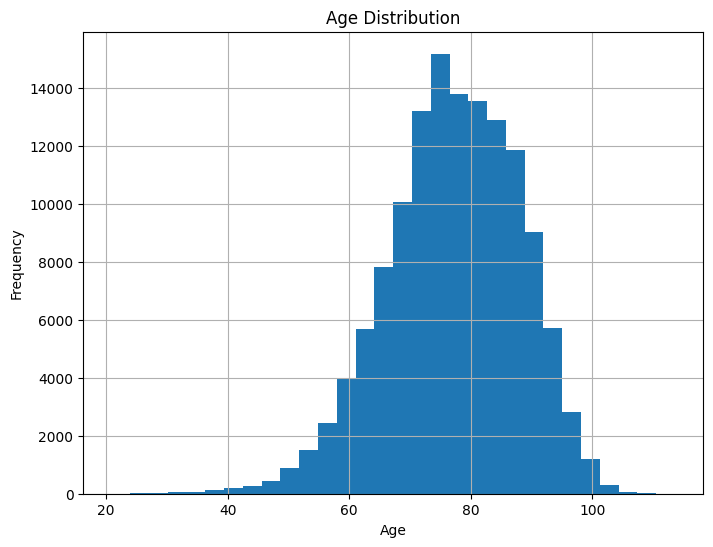

In [42]:
plt.figure(figsize=(8,6))
df1['Age at update'].hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [43]:
df1['Marital status'].value_counts()

Married                     73020
Divorced                    26856
Widowed                     19378
Never married                9352
Separated                    3708
Unknown                       534
Not specified (no value)      286
Single                        118
Name: Marital status, dtype: int64

## Plot marital status distribtution

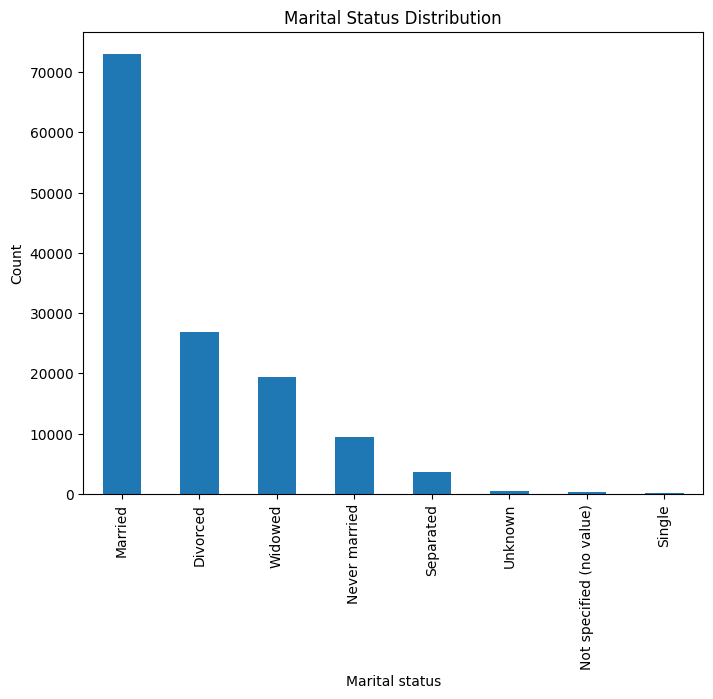

In [44]:
plt.figure(figsize=(8,6))
marital_counts = df1['Marital status'].value_counts()
marital_counts.plot(kind = 'bar')
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

In [45]:
df1['Ruca category'].value_counts()

Urban            84092
Rural            46614
Highly rural      2034
Not specified      512
Name: Ruca category, dtype: int64

## Plot rural category distribution

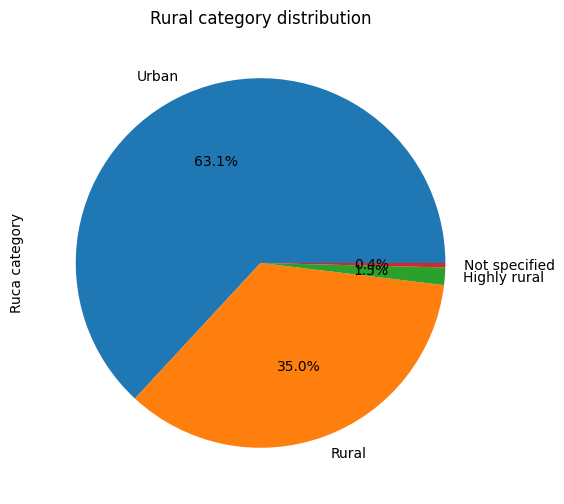

In [46]:
plt.figure(figsize=(8,6))
rural_counts = df1['Ruca category'].value_counts()
rural_counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Rural category distribution')
plt.show()

# Demographic Static Train

In [47]:
df2 = pd.read_csv('/content/demographics_static_train.csv')
df2.head()

,Unnamed: 0,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,0,168674,Hispanic or Latino,Male,White,Yes
1,1,168681,Not Hispanic or Latino,Male,White,Yes
2,2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,3,168711,Not Hispanic or Latino,Male,Other,Yes
4,4,168720,Not Hispanic or Latino,Male,White,Yes


In [48]:
df2 = df2.drop('Unnamed: 0', axis = 1)
df2.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [49]:
df2.shape

(133252, 5)

In [50]:
df2.isnull().sum()

Internalpatientid    0
Ethnicity            0
Gender               0
Races                0
Veteran flag         0
dtype: int64

In [51]:
df2['Ethnicity'].value_counts()

Not Hispanic or Latino    102367
Not specified              26486
Hispanic or Latino          4399
Name: Ethnicity, dtype: int64

In [52]:
df2['Gender'].value_counts()

Male      129777
Female      3475
Name: Gender, dtype: int64

In [53]:
df2['Races'].value_counts()

White                                        85159
Not specified (no value)                     22501
Black or African American                    16699
Other                                         6513
White ; Other                                 1431
Asian                                          431
Black or African American ; Other              267
Black or African American ; White              198
Asian ; Other                                   17
White ; Asian                                   16
Black or African American ; White ; Other       11
White ; Asian ; Other                            5
Black or African American ; Asian                2
(Censored)                                       1
Black or African American ; White ; Asian        1
Name: Races, dtype: int64

In [54]:
df2['Veteran flag'].value_counts()

Yes    133093
No        159
Name: Veteran flag, dtype: int64

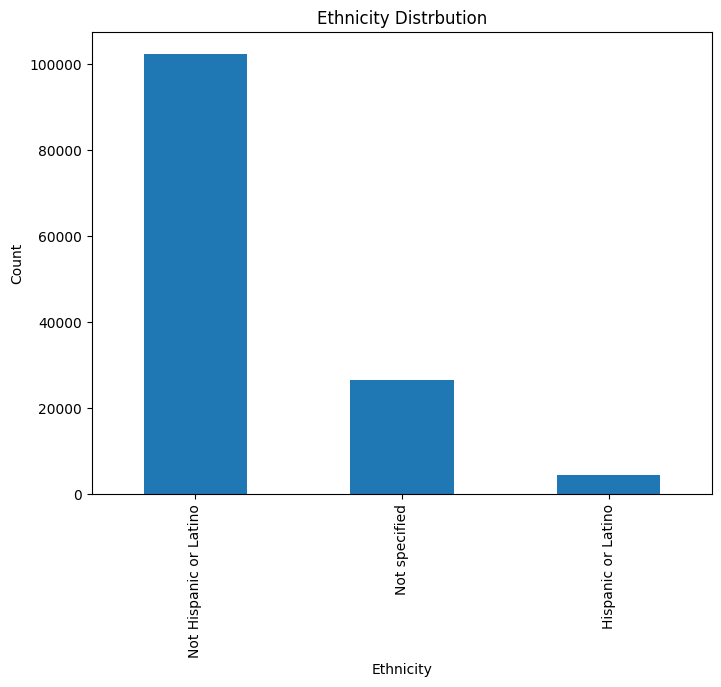

In [55]:
# Analyze the ethinicity distribution

ethinicity_distribution = df2['Ethnicity'].value_counts()

# Map the values to meaningful categories

ethinicity_distribution = ethinicity_distribution.replace({
    1:'Not Hispanic or Latino',
    2: 'Not specified',
    3: 'Hispanic or Latino'
})

# Plot the ethinicty distrbution

plt.figure(figsize=(8,6))
ethinicity_distribution.plot(kind = 'bar')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Ethnicity Distrbution')
plt.show()

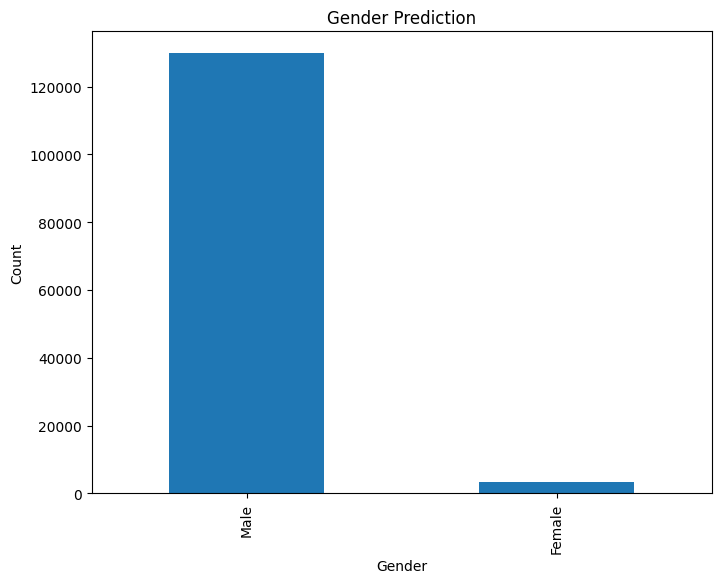

In [56]:
# Analyze the gender distrbution

gender_distribution = df2['Gender'].value_counts()

#plot the gender distribution

plt.figure(figsize=(8,6))
gender_distribution.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Prediction')
plt.show()

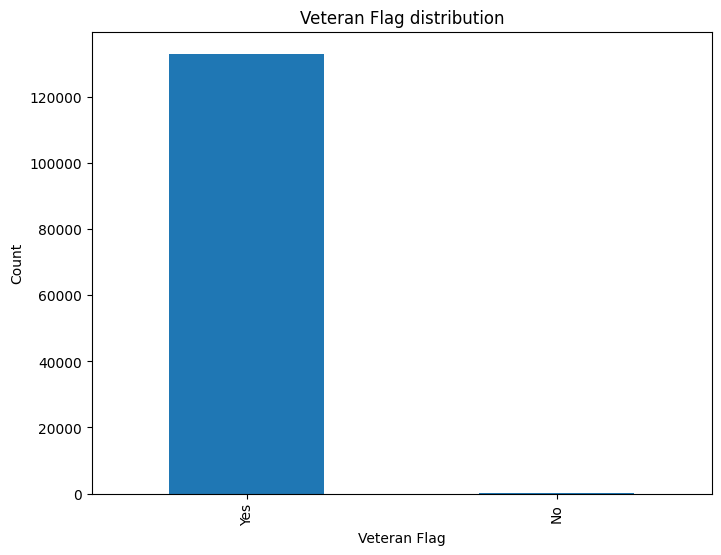

In [57]:
#Analyze the veteran flag distribution

veteran_flag_distribution = df2['Veteran flag'].value_counts()

# Plot the veteran flag distribution

plt.figure(figsize = (8,6))
veteran_flag_distribution.plot(kind = 'bar')
plt.xlabel('Veteran Flag')
plt.ylabel('Count')
plt.title('Veteran Flag distribution')
plt.show()

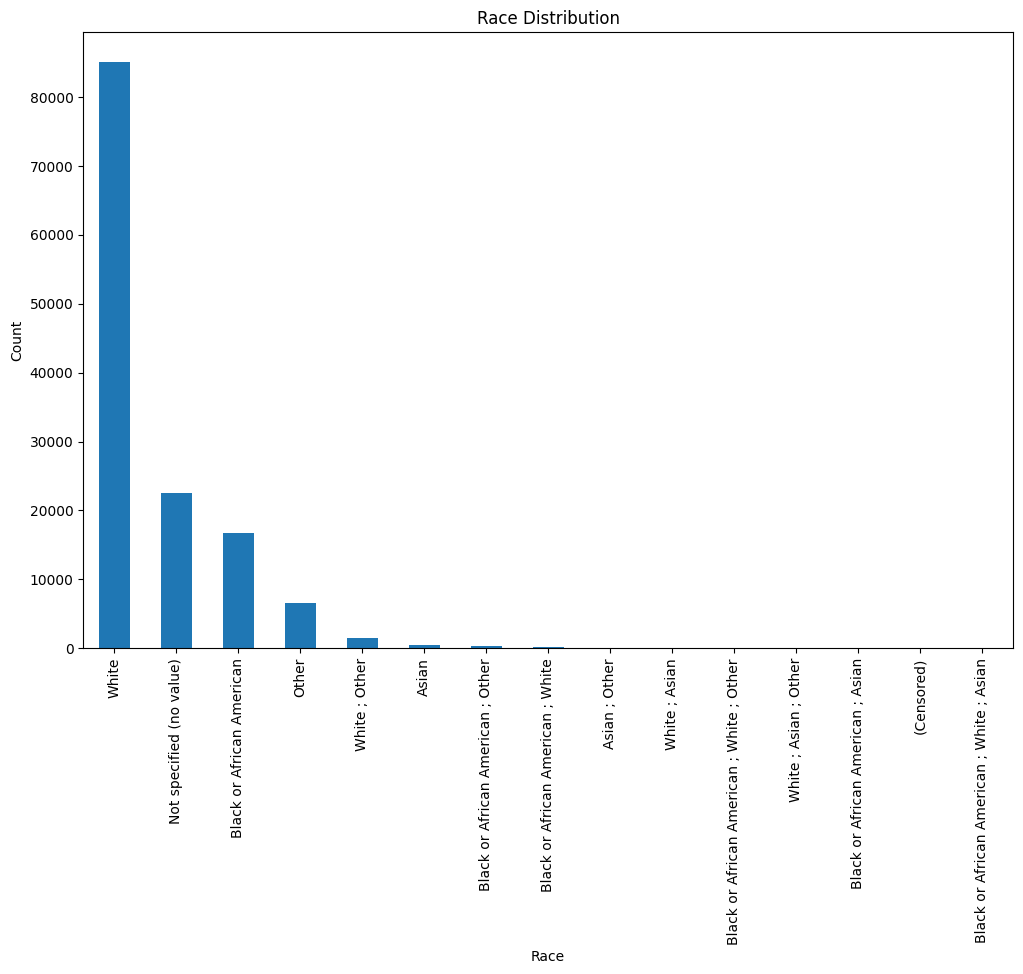

In [58]:
# Analyze the races distribtion

races_distribution = df2['Races'].value_counts()

#Plot the races distrbution

plt.figure(figsize=(12,8))
races_distribution.plot(kind = 'bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race Distribution')
plt.show()

# ED Visits

In [3]:
df3 = pd.read_csv('/content/ed_visits_train.csv')
df3.head()

,Unnamed: 0,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,3,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,4,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,5,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,6,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [4]:
df3 = df3.drop('Unnamed: 0', axis = 1)
df3.head()

,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [5]:
df3.shape

(549857, 8)

In [6]:
df3.isnull().sum()

Internalpatientid                             0
Age at ed visit                               0
Ed visit start date                           0
Discharge date ed                            78
Died during ed visit                          0
First listed diagnosis icd10 subcategory      0
Second listed diagnosis icd10 subcategory     0
State                                         0
dtype: int64

In [7]:
df3['First listed diagnosis icd10 subcategory'].nunique()

3645

In [8]:
df3['Second listed diagnosis icd10 subcategory'].nunique()

3060

In [9]:
df3['Died during ed visit'].value_counts()

No     549746
Yes       111
Name: Died during ed visit, dtype: int64

In [10]:
print(df3['Age at ed visit'].max())
print(df3['Age at ed visit'].min())
print(df3['Age at ed visit'].mean())

108.576240500076
18.342004547296952
70.03421614361285


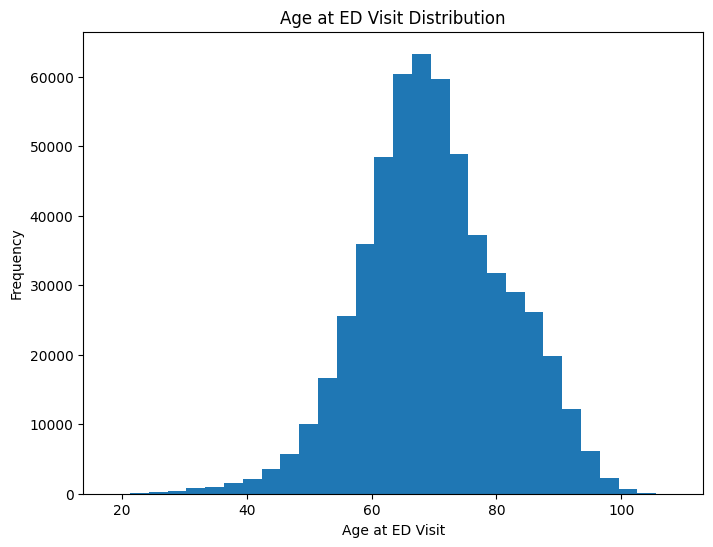

In [11]:
# Plot the distribution of age at ed visit

plt.figure(figsize=(8,6))
plt.hist(df3['Age at ed visit'], bins = 30)
plt.xlabel('Age at ED Visit')
plt.ylabel('Frequency')
plt.title('Age at ED Visit Distribution')
plt.show()

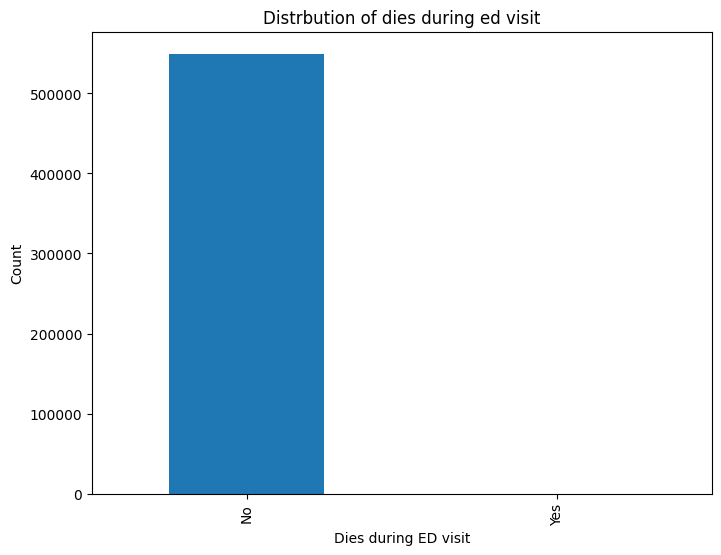

In [12]:
# Analyze the distrbution of died during ed visit

dies_during_visit_counts = df3['Died during ed visit'].value_counts()

#Plot the distrbution of dies during ed visit

plt.figure(figsize=(8,6))
dies_during_visit_counts.plot(kind='bar')
plt.xlabel('Dies during ED visit')
plt.ylabel('Count')
plt.title('Distrbution of dies during ed visit')
plt.show()

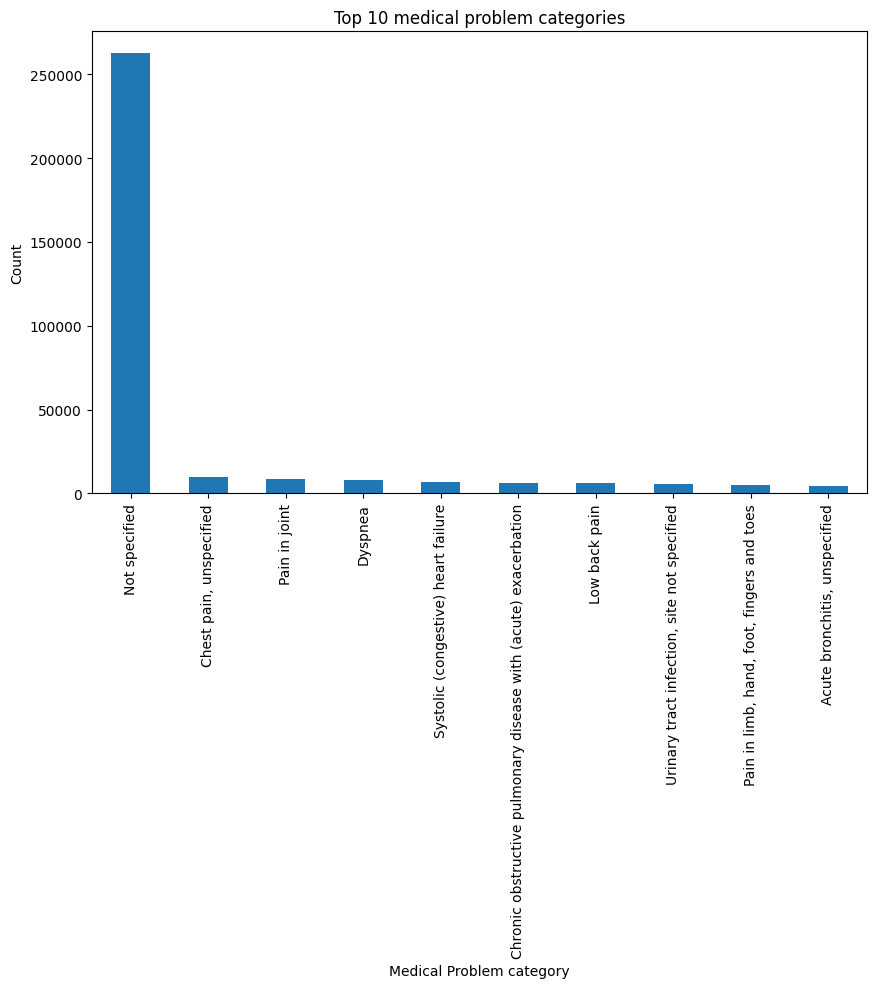

In [13]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = df3['First listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

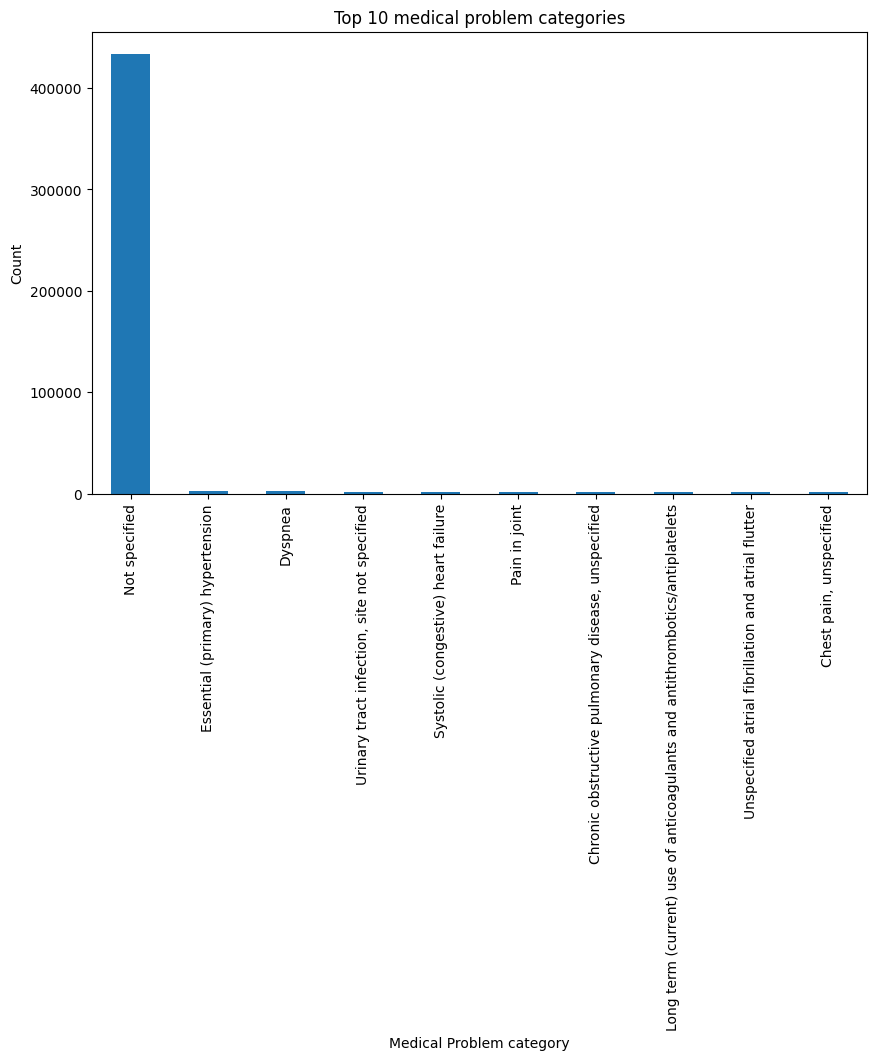

In [14]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = df3['Second listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

In [15]:
# Define the age ranges
age_ranges = [(22, 35), (36, 45), (46, 55), (56, 65), (66, 75), (75, 85), (86, 95), (96, 105)]



# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    df3[range_label] = df3.apply(
        lambda row: row['First listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )
    df3[second_range_label] = df3.apply(
        lambda row: row['Second listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )


In [16]:
# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df_grouped =df3.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped

<ipython-input-16-3cf5964fa722>:1: FutureWarning: ['Age at ed visit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped =df3.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))


,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,22-35_icd10,22-35_second_icd10,36-45_icd10,36-45_second_icd10,...,56-65_icd10,56-65_second_icd10,66-75_icd10,66-75_second_icd10,75-85_icd10,75-85_second_icd10,86-95_icd10,86-95_second_icd10,96-105_icd10,96-105_second_icd10
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",,,,,...,,,"Disorders of calcium metabolism,Not specified,...","Not specified,Not specified,Not specified,Not ...",Combined systolic (congestive) and diastolic (...,"Contusion of hip,Not specified",,,,
2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",,,,,...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Pain in limb, hand, foot, fingers and toes,Chr...","Not specified,Not specified,Other superficial ...",,,,,,
4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",,,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",,,,,...,Not specified,Not specified,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,
10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",,,,,...,,,Not specified,Not specified,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169050,"2013-06-07 20:39:49.0,2009-04-11 10:42:14.0","2013-06-08 04:06:17.0,2009-04-11 13:39:28.0","No,No","Not specified,Not specified","Not specified,Not specified","Florida,Florida",,,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
169053,"2013-08-07 00:11:52.0,2010-02-05 18:08:38.0,20...","2013-08-07 08:28:53.0,2010-02-05 20:46:34.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...","California,California,California,California,Ca...",,,,,...,,,,,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",,,,
169057,"2024-06-07 17:43:54.0,2022-04-09 02:25:03.0,20...","2024-06-07 21:45:04.0,2022-04-09 03:09:35.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...","California,California,California,California,Ca...",,,,,...,,,,,"Acute bronchitis due to Mycoplasma pneumoniae,...","Not specified,Not specified,Body mass index [B...",,,,


In [17]:

# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()
df_grouped

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,22-35_icd10,22-35_second_icd10,36-45_icd10,...,56-65_icd10,56-65_second_icd10,66-75_icd10,66-75_second_icd10,75-85_icd10,75-85_second_icd10,86-95_icd10,86-95_second_icd10,96-105_icd10,96-105_second_icd10
0,1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",,,,...,,,"Disorders of calcium metabolism,Not specified,...","Not specified,Not specified,Not specified,Not ...",Combined systolic (congestive) and diastolic (...,"Contusion of hip,Not specified",,,,
1,2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",,,,...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Pain in limb, hand, foot, fingers and toes,Chr...","Not specified,Not specified,Other superficial ...",,,,,,
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
3,8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",,,,...,Not specified,Not specified,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",,,,...,,,Not specified,Not specified,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58235,169050,"2013-06-07 20:39:49.0,2009-04-11 10:42:14.0","2013-06-08 04:06:17.0,2009-04-11 13:39:28.0","No,No","Not specified,Not specified","Not specified,Not specified","Florida,Florida",,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
58236,169053,"2013-08-07 00:11:52.0,2010-02-05 18:08:38.0,20...","2013-08-07 08:28:53.0,2010-02-05 20:46:34.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...","California,California,California,California,Ca...",,,,...,,,,,"Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...",,,,
58237,169057,"2024-06-07 17:43:54.0,2022-04-09 02:25:03.0,20...","2024-06-07 21:45:04.0,2022-04-09 03:09:35.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...","California,California,California,California,Ca...",,,,...,,,,,"Acute bronchitis due to Mycoplasma pneumoniae,...","Not specified,Not specified,Body mass index [B...",,,,
58238,169060,"2017-04-01 01:49:03.0,2015-06-16 11:51:20.0,20...","2017-04-01 22:31:44.0,2015-06-16 19:02:16.0,20...","No,No,No,No,No",Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...","California,California,California,California,Ca...",,,,...,,,Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,

In [28]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)

missing_values_count = merge_ed_visit_death.isnull().sum()
total_rows = merge_ed_visit_death.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Ed visit start date,0,0.000000
Discharge date ed,10,0.017170
Died during ed visit,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
State,0,0.000000
22-35_icd10,57918,99.447115
22-35_second_icd10,57918,99.447115
36-45_icd10,57128,98.090659


In [23]:
death_file['death'] = 1
death_file.head()

,Internalpatientid,Age at death,Death date,death
0,100036,72.412770,2015-01-18 20:49:10.0,1
1,100037,75.241135,2008-10-16 15:14:26.0,1
2,100045,85.399403,2019-01-26 11:33:52.0,1
3,100095,84.136551,2004-08-10 21:49:35.0,1
4,10013,68.372126,2007-06-11 00:17:06.0,1


In [24]:
merge_ed_visit_death = pd.merge(df_grouped, death_file, how='left',on='Internalpatientid')

In [25]:
merge_ed_visit_death.head()

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,22-35_icd10,22-35_second_icd10,36-45_icd10,...,66-75_second_icd10,75-85_icd10,75-85_second_icd10,86-95_icd10,86-95_second_icd10,96-105_icd10,96-105_second_icd10,Age at death,Death date,death
0,1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",NaN,NaN,NaN,...,"Not specified,Not specified,Not specified,Not ...",Combined systolic (congestive) and diastolic (...,"Contusion of hip,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",NaN,NaN,NaN,...,"Not specified,Not specified,Other superficial ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",NaN,NaN,NaN,...,NaN,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1.0
3,8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",NaN,NaN,NaN,...,"Not specified,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",NaN,NaN,NaN,...,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,72.384665,2022-08-25 14:16:51.0,1.0


In [26]:
merge_ed_visit_death['death'] = merge_ed_visit_death['death'].fillna(0.0)

In [27]:
merge_ed_visit_death.head()

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,22-35_icd10,22-35_second_icd10,36-45_icd10,...,66-75_second_icd10,75-85_icd10,75-85_second_icd10,86-95_icd10,86-95_second_icd10,96-105_icd10,96-105_second_icd10,Age at death,Death date,death
0,1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",NaN,NaN,NaN,...,"Not specified,Not specified,Not specified,Not ...",Combined systolic (congestive) and diastolic (...,"Contusion of hip,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",NaN,NaN,NaN,...,"Not specified,Not specified,Other superficial ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",NaN,NaN,NaN,...,NaN,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1.0
3,8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",NaN,NaN,NaN,...,"Not specified,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",NaN,NaN,NaN,...,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,72.384665,2022-08-25 14:16:51.0,1.0


In [29]:
death_happened = merge_ed_visit_death[merge_ed_visit_death['death']==1.0]

In [30]:
death_happened.head()

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,22-35_icd10,22-35_second_icd10,36-45_icd10,...,66-75_second_icd10,75-85_icd10,75-85_second_icd10,86-95_icd10,86-95_second_icd10,96-105_icd10,96-105_second_icd10,Age at death,Death date,death
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",NaN,NaN,NaN,...,NaN,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN,84.190359,2015-02-24 13:49:53.0,1.0
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",NaN,NaN,NaN,...,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,72.384665,2022-08-25 14:16:51.0,1.0
7,15,"2016-04-25 06:02:43.0,2015-06-18 05:55:18.0","2016-04-25 10:56:34.0,2015-06-18 12:26:12.0","No,No","Respiratory failure, unspecified,Combined syst...",Unspecified atrial fibrillation and atrial flu...,"Texas,Texas",NaN,NaN,NaN,...,NaN,"Respiratory failure, unspecified,Combined syst...",Unspecified atrial fibrillation and atrial flu...,NaN,NaN,NaN,NaN,86.598848,2019-01-16 21:05:39.0,1.0
8,16,"2014-07-30 19:56:50.0,2014-09-24 10:15:38.0,20...","2014-07-31 01:28:51.0,2014-09-24 14:34:18.0,20...","No,No,No,No,No","Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...","Oklahoma,Oklahoma,Oklahoma,Oklahoma,Oklahoma",NaN,NaN,NaN,...,NaN,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...",NaN,NaN,NaN,NaN,78.894455,2016-01-13 22:09:20.0,1.0
9,19,"2015-12-07 23:24:45.0,2015-11-09 16:53:25.0,20...","2015-12-08 05:41:31.0,2015-11-09 22:14:22.0,20...","No,No,No,No","Chest pain, unspecified,Unstable angina,Not sp...","Syncope and collapse,Long term (current) use o...","Arizona,Missouri,Missouri,Missouri",NaN,NaN,NaN,...,"Syncope and collapse,Long term (current) use o...",NaN,NaN,NaN,NaN,NaN,NaN,71.207349,2016-01-20 06:51:50.0,1.0


In [31]:
# Replace blank values with NaN
death_happened.replace('', np.nan, inplace=True)

missing_values_count = death_happened.isnull().sum()
total_rows = death_happened.shape[0]

missing_percentage = (missing_values_count / total_rows) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_percentage
})

print("Missing values summary per column:")
missing_data_summary

Missing values summary per column:


<ipython-input-31-e4bde6cfdc6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_happened.replace('', np.nan, inplace=True)


,Missing Values Count,Missing Values Percentage
Internalpatientid,0,0.000000
Ed visit start date,0,0.000000
Discharge date ed,3,0.009118
Died during ed visit,0,0.000000
First listed diagnosis icd10 subcategory,0,0.000000
Second listed diagnosis icd10 subcategory,0,0.000000
State,0,0.000000
22-35_icd10,32865,99.887545
22-35_second_icd10,32865,99.887545
36-45_icd10,32724,99.458999


# Immunization train

In [ ]:
df4 = pd.read_csv('/content/immunization_train.csv')
df4.head()

,Unnamed: 0,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,3,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,4,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,5,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,6,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,7,100008,71.570887,2020-10-05 03:49:18.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Complete,North Carolina


In [ ]:
df4 = df4.drop('Unnamed: 0', axis = 1)
df4.head()

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Complete,North Carolina


In [ ]:
df4.shape

(1847645, 10)

In [ ]:
df4.isnull().sum()

Internalpatientid               0
Age at immunization             0
Immunization date               0
Immunization                    3
Dose quantity             1836499
Dose unit                 1836502
Administered elsewhere    1585089
Cvx code                    18322
Series doses                    0
State                           0
dtype: int64

## **Drop Dose quantity , dose Unit & Administered elsewhere**

In [ ]:
df4.nunique()

Internalpatientid          125159
Age at immunization       1846695
Immunization date         1531040
Immunization                  532
Dose quantity               11057
Dose unit                       5
Administered elsewhere      31779
Cvx code                      121
Series doses                   10
State                          51
dtype: int64

In [ ]:
print(df4['Age at immunization'].min())
print(df4['Age at immunization'].max())
print(df4['Age at immunization'].mean())

11.021683798196282
109.88604046334297
70.3009536205307


In [ ]:
df4['Immunization'].nunique()

532

In [ ]:
df4['Series doses'].nunique()

10

In [ ]:
df4['Cvx code'].nunique()

121

In [ ]:
df4.describe()

,Internalpatientid,Age at immunization,Dose quantity,Cvx code
count,1.847645e+06,1.847645e+06,11146.000000,1.829323e+06
mean,8.481039e+04,7.030095e+01,0.731119,1.067990e+02
std,4.880763e+04,1.114131e+01,4.608376,4.040394e+01
min,1.000000e+00,1.102168e+01,0.028745,1.000000e+00
25%,4.254900e+04,6.278667e+01,0.486425,8.800000e+01
50%,8.518500e+04,7.044583e+01,0.499533,8.800000e+01
75%,1.270130e+05,7.831251e+01,0.512471,1.330000e+02
max,1.690640e+05,1.098860e+02,103.000000,5.000000e+02


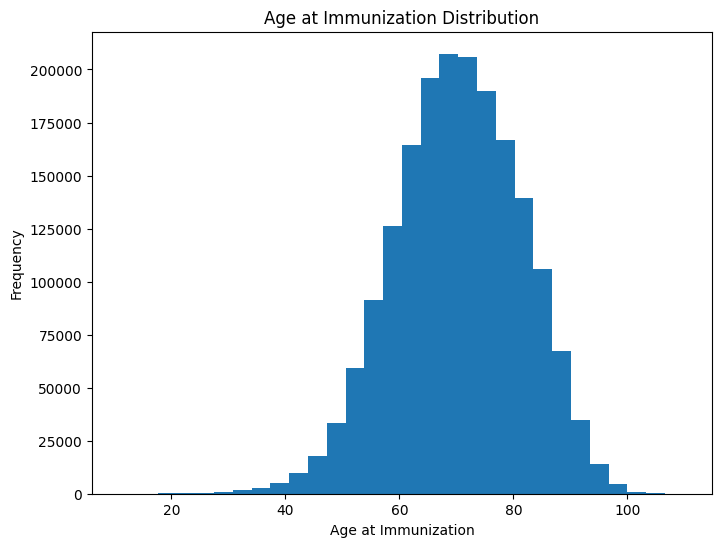

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df4['Age at immunization'], bins = 30)
plt.xlabel('Age at Immunization')
plt.ylabel('Frequency')
plt.title('Age at Immunization Distribution')
plt.show()

In [ ]:
df4.Immunization.value_counts()

INFLUENZA, UNSPECIFIED FORMULATION                     537890
FLU,3 YRS (HISTORICAL)                                 235259
INFLUENZA (HISTORICAL)                                 117578
PNEUMOCOCCAL, UNSPECIFIED FORMULATION                  107600
TD(ADULT) UNSPECIFIED FORMULATION                       92554
                                                        ...  
HAEMOPHILUS FLU B (HISTORICAL)                              1
OPV BIVALENT                                                1
IM Injection #1 (of 2)-1cc Hepatitis A (HISTORICAL)         1
BCG (HISTORICAL)                                            1
FLU VACCINE, 6-35 M O (HISTORICAL)                          1
Name: Immunization, Length: 532, dtype: int64

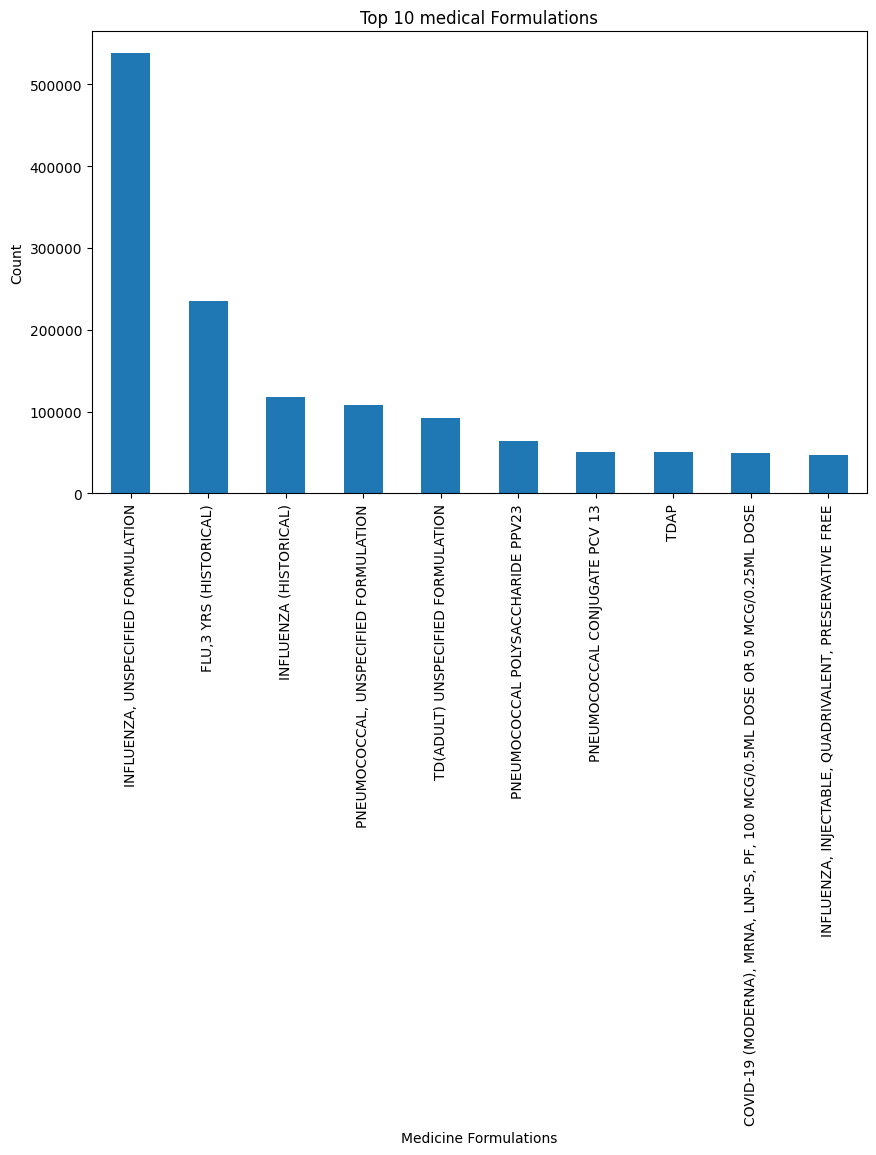

In [ ]:

top_n = 10
top_categories = df4['Immunization'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medicine Formulations')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical Formulations')
plt.show()

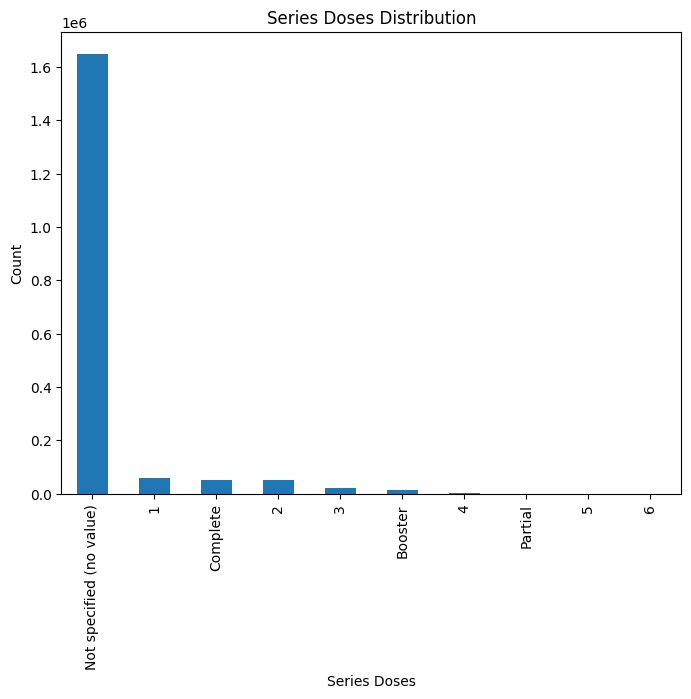

In [ ]:
# anlayze the distribution of series dose

series_dose_counts = df4['Series doses'].value_counts()

# Plot the distribution of series doses

plt.figure(figsize=(8,6))
series_dose_counts.plot(kind='bar')
plt.xlabel('Series Doses')
plt.ylabel('Count')
plt.title('Series Doses Distribution')
plt.show()

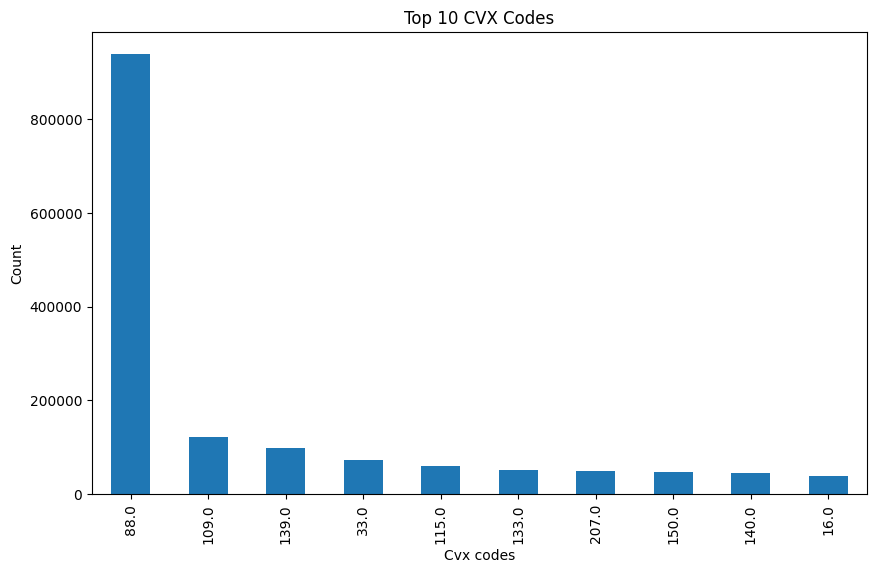

In [ ]:

top_n = 10
top_categories = df4['Cvx code'].value_counts().head(top_n)

#plot the top N CVX code

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Cvx codes')
plt.ylabel('Count')
plt.title(f'Top {top_n} CVX Codes')
plt.show()

# Inpatient Location train

In [ ]:
df5 = pd.read_csv('/content/inpatient_location_train.csv')
df5.head()

,Unnamed: 0,Internalpatientid,Age at location,Location start date,Location end date,Service,Died at location,State
0,0,100005,66.405085,2002-09-09 01:24:31.0,2002-09-12 01:00:40.0,MEDICINE,No,Oklahoma
1,1,100008,70.233217,2019-06-04 05:46:59.0,2019-06-05 10:07:31.0,SURGERY,No,North Carolina
2,5,100015,55.357221,2001-04-01 01:32:23.0,2001-04-02 20:04:22.0,MEDICINE,No,Rhode Island
3,6,100015,55.684944,2001-07-29 20:19:52.0,2001-07-30 22:42:13.0,MEDICINE,No,Rhode Island
4,7,100020,60.574319,2022-04-05 21:55:19.0,NaN,SURGERY,No,Pennsylvania


In [ ]:
df5 = df5.drop('Unnamed: 0', axis = 1)
df5.head()

,Internalpatientid,Age at location,Location start date,Location end date,Service,Died at location,State
0,100005,66.405085,2002-09-09 01:24:31.0,2002-09-12 01:00:40.0,MEDICINE,No,Oklahoma
1,100008,70.233217,2019-06-04 05:46:59.0,2019-06-05 10:07:31.0,SURGERY,No,North Carolina
2,100015,55.357221,2001-04-01 01:32:23.0,2001-04-02 20:04:22.0,MEDICINE,No,Rhode Island
3,100015,55.684944,2001-07-29 20:19:52.0,2001-07-30 22:42:13.0,MEDICINE,No,Rhode Island
4,100020,60.574319,2022-04-05 21:55:19.0,NaN,SURGERY,No,Pennsylvania


In [ ]:
df5.shape

(850037, 7)

In [ ]:
df5.isnull().sum()

Internalpatientid          0
Age at location            0
Location start date        0
Location end date      19214
Service                    0
Died at location           0
State                      0
dtype: int64

In [ ]:
print(df5['Age at location'].min())
print(df5['Age at location'].max())
print(df5['Age at location'].mean())

20.39913281527081
109.22492751557988
69.04221437300815


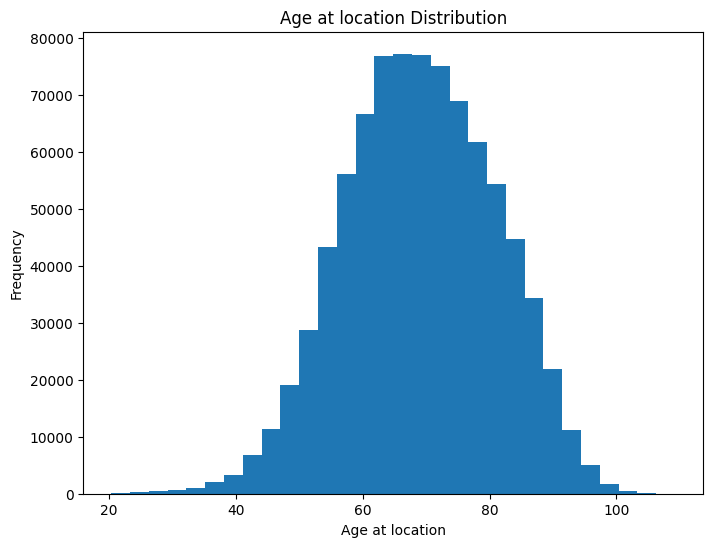

In [ ]:
# plot for age at location
plt.figure(figsize=(8,6))
plt.hist(df5['Age at location'], bins = 30)
plt.xlabel('Age at location')
plt.ylabel('Frequency')
plt.title('Age at location Distribution')
plt.show()

In [ ]:
df5['Service'].nunique()

14

In [ ]:
df5['Service'].value_counts()

MEDICINE                    477243
SURGERY                     132110
NON-COUNT                    74145
NHCU                         72722
PSYCHIATRY                   34505
DOMICILIARY                  33405
INTERMEDIATE MED              9230
SPINAL CORD INJURY            5247
REHAB MEDICINE                3863
NEUROLOGY                     3577
BLIND REHAB                   3450
(Censored)                     318
Not specified                  180
Not specified (no value)        42
Name: Service, dtype: int64

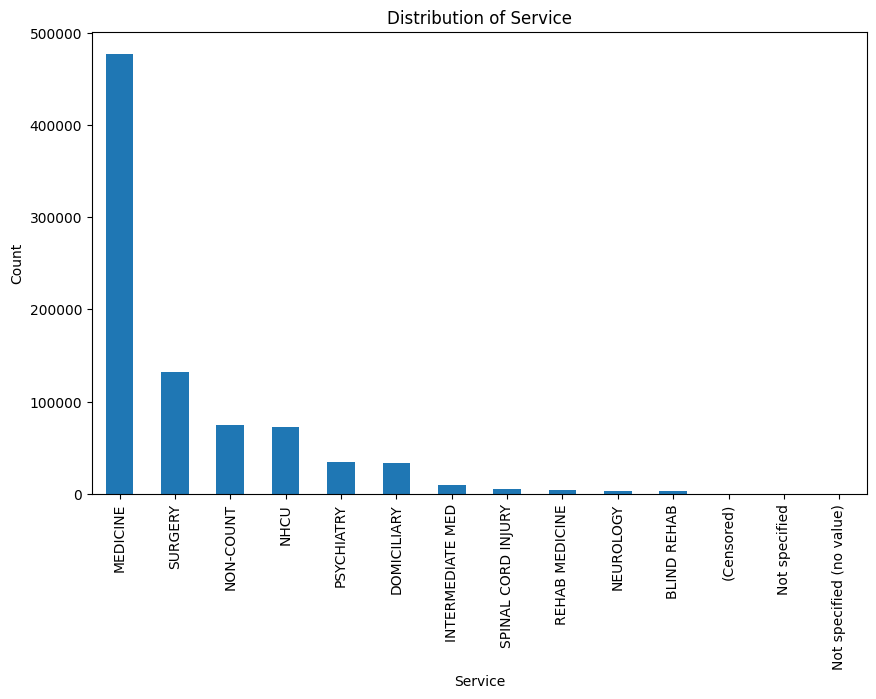

In [ ]:
# Analyze the distribution of service
service_counts = df5['Service'].value_counts()
# Plot the distribution of service

plt.figure(figsize=(10,6))
service_counts.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Service')
plt.show()

In [ ]:
df5['Died at location'].nunique()

2

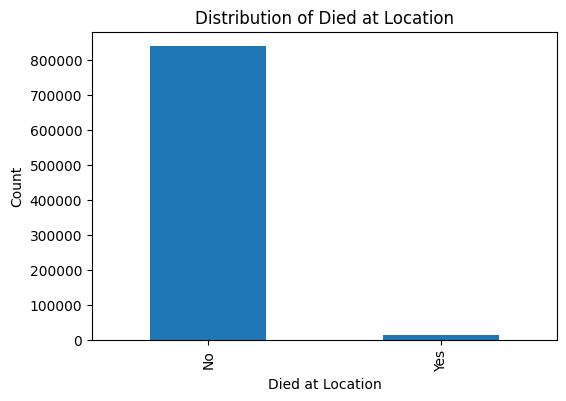

In [ ]:
# Analyze the distribution of dies at location

died_at_location_counts = df5['Died at location'].value_counts()

# Plot the distribution of died at location

plt.figure(figsize=(6,4))
died_at_location_counts.plot(kind='bar')
plt.xlabel('Died at Location')
plt.ylabel('Count')
plt.title('Distribution of Died at Location')
plt.show()


# Inpatient speciality train

In [ ]:
df6 = pd.read_csv('/content/inpatient_specialty_train.csv')
df6.head()

,Unnamed: 0,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
0,0,1,78.725684,2022-12-31 05:41:51.0,2023-01-01 23:06:29.0,DERMATOLOGY,Indiana
1,1,100001,86.568969,2012-07-21 23:00:00.0,2012-07-22 19:18:47.0,PM&R TRANSITIONAL REHAB,North Carolina
2,3,100015,56.646451,2002-07-16 06:40:13.0,2002-07-16 06:40:13.0,INTERMEDIATE MEDICINE,Massachusetts
3,4,100015,58.247495,2004-02-21 11:01:35.0,2004-02-22 14:56:40.0,DOMICILIARY PTSD,Rhode Island
4,5,100019,81.174959,1999-10-24 10:44:24.0,1999-10-31 10:20:31.0,PLASTIC SURGERY,Florida


In [ ]:
df6 = df6.drop('Unnamed: 0', axis = 1)
df6.head()

,Internalpatientid,Age at specialty,Specialty start date,Specialty end date,Specialty,State
0,1,78.725684,2022-12-31 05:41:51.0,2023-01-01 23:06:29.0,DERMATOLOGY,Indiana
1,100001,86.568969,2012-07-21 23:00:00.0,2012-07-22 19:18:47.0,PM&R TRANSITIONAL REHAB,North Carolina
2,100015,56.646451,2002-07-16 06:40:13.0,2002-07-16 06:40:13.0,INTERMEDIATE MEDICINE,Massachusetts
3,100015,58.247495,2004-02-21 11:01:35.0,2004-02-22 14:56:40.0,DOMICILIARY PTSD,Rhode Island
4,100019,81.174959,1999-10-24 10:44:24.0,1999-10-31 10:20:31.0,PLASTIC SURGERY,Florida


In [ ]:
df6.shape

(1452910, 6)

In [ ]:
df6.isnull().sum()

In [ ]:
print(df6['Age at specialty'].min())
print(df6['Age at specialty'].max())
print(df6['Age at specialty'].mean())

In [ ]:
# plot for age at location
plt.figure(figsize=(8,6))
plt.hist(df6['Age at specialty'], bins = 30)
plt.xlabel('Age at specialty')
plt.ylabel('Frequency')
plt.title('Age at specialty Distribution')
plt.show()

In [ ]:
df6['Specialty'].nunique()

In [ ]:
df6['Specialty'].value_counts().head(10)

In [ ]:
# Analyze the distribution of speicality

speciality_counts = df6['Specialty'].value_counts()

#plot the distribution of specialty
plt.figure(figsize=(100,50))
speciality_counts.plot(kind='bar')
plt.xlabel('Speciality')
plt.ylabel('Count')
plt.title('Distribution of Speciality')
plt.show()

In [ ]:
death_file = pd.read_csv('/content/death_train.csv')
death_file.head()

In [ ]:
death_file.shape

In [ ]:
merged_df = pd.merge(df1, df2, on = 'Internalpatientid', how = 'outer')
merged_df = pd.merge(merged_df, df3, on = 'Internalpatientid', how = 'outer')
merged_df = pd.merge(merged_df, df4, on = 'Internalpatientid', how = 'outer')
merged_df = pd.merge(merged_df, df5, on = 'Internalpatientid', how = 'outer')
merged_df = pd.merge(merged_df, df6, on = 'Internalpatientid', how = 'outer')

In [ ]:
# concate all rows with the same internalpatient_id
merged_df = merged_df.groupby('Internalpatientid').first().reset_index()

In [ ]:
print(merged_df.head())